In [ ]:
#TODO:
стрипнуть все строковые

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import pandas as pd
df = pd.read_csv('data.csv') #.drop(['Unnamed: 0.1', 'Unnamed: 0'])

num_cols = ['Drug_dose', 
            'NP_concentration', 'NP size_min', 'NP size_max', 'NP size_avg', 
            'ZOI_drug', 'ZOI_NP', 'ZOI_drug_NP', 
            'fold_increase_in_antibacterial_activity (%)']

cat_cols = ['Bacteria', 'NP_Synthesis', 'Drug',	'Drug_class_drug_bank', 'shape', 'method', 'MDR_check']

df

,Unnamed: 0.1,Unnamed: 0,Bacteria,NP_Synthesis,Drug,Drug_class_drug_bank,Drug_dose,NP_concentration,NP size_min,NP size_max,NP size_avg,shape,method,ZOI_drug,ZOI_NP,ZOI_drug_NP,fold_increase_in_antibacterial_activity (%),MDR_check
0,0,86,Escherichia coli,chem_synthesis_reduction_by_D_maltose,Amoxicillin,Lactams,NaN,NaN,4.0,10.0,8.00,spherical,MIC,32+,6.3,32+,NaN,1
1,1,87,Escherichia coli,chem_synthesis_reduction_by_D_maltose,Penicillin,Carboxylic acids and derivatives,NaN,NaN,4.0,10.0,8.00,spherical,MIC,32+,6.3,32+,NaN,1
2,2,679,Escherichia coli,chem_synthesis_reduction_by_D_maltose,Amoxicillin,Lactams,NaN,NaN,15.0,30.0,28.00,spherical,MIC,32+,25,32+,NaN,1
3,3,680,Escherichia coli,chem_synthesis_reduction_by_D_maltose,Penicillin,Carboxylic acids and derivatives,NaN,NaN,15.0,30.0,28.00,spherical,MIC,32+,25,32+,NaN,1
4,4,638,Micrococcus luteus,green_synthesis from fungus Aspergillus flavus,Vancomycin,Carboxylic acids and derivatives,30.0,100,5.0,30.0,21.00,spherical,disc_diffusion,0,14,17+2,7.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,878,836,Staphylococcus aureus,green_synthesis using C. zylinicum aqueous ext...,NaN,NaN,NaN,NaN,10.0,78.9,44.45,spherical,MIC,NaN,4.5,NaN,NaN,0
879,879,837,Acinetobacter baumanii,green_synthesis using C. zylinicum aqueous ext...,NaN,NaN,NaN,NaN,10.0,78.9,44.45,spherical,MIC,NaN,5.7,NaN,NaN,0
880,880,880,Enterococcus faecalis,green_synthesis using extract of Klebsiella pn...,NaN,NaN,NaN,10,20.0,20.0,20.00,spherical,disc_diffusion,NaN,10,NaN,NaN,0
881,881,881,Enterococcus faecalis,green_synthesis using extract of Klebsiella pn...,NaN,NaN,NaN,20,20.0,20.0,20.00,spherical,disc_diffusion,NaN,18,NaN,NaN,0


In [ ]:
for col in df:
    print(f'{col} - nans: {df[col].isna().sum()}')

Unnamed: 0.1 - nans: 0
Unnamed: 0 - nans: 0
Bacteria - nans: 0
NP_Synthesis - nans: 0
Drug - nans: 241
Drug_class_drug_bank - nans: 241
Drug_dose - nans: 306
NP_concentration - nans: 250
NP size_min - nans: 0
NP size_max - nans: 0
NP size_avg - nans: 0
shape - nans: 0
method - nans: 0
ZOI_drug - nans: 256
ZOI_NP - nans: 442
ZOI_drug_NP - nans: 299
fold_increase_in_antibacterial_activity (%) - nans: 462
MDR_check - nans: 0
various_conc_tested - nans: 0


# Numerical features

In [4]:
df['ZOI_drug'] = df['ZOI_drug'].replace('32+', '32').astype('float64')
df['ZOI_drug'].unique()

array([3.200e+01, 0.000e+00, 1.200e+01, 5.000e+02, 2.200e+01, 4.600e+01,
       4.800e+01, 4.700e+01, 4.400e+01, 3.000e+01, 2.800e+01, 2.700e+01,
       4.000e+01, 2.300e+01, 2.500e+01, 3.400e+01, 2.600e+01, 3.700e+01,
       2.900e+01, 3.600e+01, 2.000e+01, 2.100e+01, 2.400e+01, 3.100e+01,
       1.000e+03, 2.500e+02, 8.000e+00, 1.400e+01, 1.700e+01, 1.800e+01,
       7.000e+00, 3.300e+01, 2.070e+01, 1.500e+01, 1.900e+01, 2.800e+00,
       1.100e+01, 1.300e+01, 1.600e+01, 1.730e+01, 1.850e+01, 9.000e+00,
       1.000e+01, 6.400e+01,       nan, 7.500e+00, 4.600e-01, 4.000e+00,
       1.000e+00, 2.000e+00, 1.250e+02, 1.250e+00, 6.250e-01, 3.125e-01,
       2.500e-01, 3.000e-02, 2.500e+00, 1.000e-02, 5.000e-02, 1.000e-01,
       5.000e-01, 7.500e-01, 1.280e+02])

In [5]:
df['ZOI_NP'] = df['ZOI_NP'].replace('50+', '50').astype('float64')
df['ZOI_NP'].unique()

array([6.300e+00, 2.500e+01, 1.400e+01,       nan, 1.500e+01, 1.300e+01,
       6.400e+01, 1.200e+01, 1.600e+01, 1.700e+01, 2.000e+01, 1.350e+01,
       2.100e+01, 1.900e+01, 1.000e+01, 2.400e+01, 1.800e+01, 2.200e+01,
       3.200e+01, 5.000e+01, 8.000e+00, 1.250e+01, 1.000e+02, 2.500e+00,
       5.000e+00, 4.000e+00, 1.100e+01, 5.000e-01, 2.500e-01, 2.000e+00,
       1.280e+02, 3.100e-01, 9.000e-02, 4.700e-01, 6.000e+01, 1.600e+02,
       1.800e+02, 2.200e+02, 4.000e+01, 1.200e+02, 1.400e+02, 0.000e+00,
       2.600e+01, 2.700e+01, 7.000e+00, 9.000e+00, 1.460e+01, 1.560e+01,
       1.730e+01, 2.030e+01, 7.800e+00, 8.100e+00, 9.800e+00, 3.000e+01,
       3.500e+01, 6.500e+01, 8.000e+01, 2.060e+01, 2.660e+01, 1.040e+00,
       2.000e-02, 4.000e+03, 1.055e+01, 1.122e+01, 1.139e+01, 1.157e+01,
       9.260e+00, 1.430e+01, 1.530e+01, 2.800e+00, 3.100e+00, 4.500e+00,
       5.700e+00, 2.300e+01])

In [6]:
df['ZOI_drug_NP'] = df['ZOI_drug_NP'].replace({'32+': '32', '17+2': '17'}).astype('float64')
df['ZOI_drug_NP'].unique()

array([3.200e+01, 1.700e+01, 1.500e+01, 6.250e+01, 5.000e+01, 4.800e+01,
       4.700e+01, 4.400e+01, 4.200e+01, 4.100e+01, 4.000e+01, 3.900e+01,
       3.800e+01, 3.700e+01, 3.600e+01, 3.500e+01, 3.400e+01, 3.125e+01,
       3.100e+01, 3.000e+01, 2.900e+01, 2.800e+01, 2.700e+01, 2.600e+01,
       2.500e+01, 2.400e+01, 2.300e+01, 2.200e+01, 2.150e+01, 2.100e+01,
       2.080e+01, 2.000e+01, 1.990e+01, 1.900e+01, 1.850e+01, 1.800e+01,
       1.600e+01, 1.530e+01, 1.475e+01, 1.433e+01, 1.400e+01, 1.300e+01,
       1.288e+01, 1.280e+01, 1.276e+01, 1.257e+01, 1.245e+01, 1.200e+01,
       1.167e+01, 1.164e+01, 1.145e+01, 1.143e+01, 1.100e+01, 1.098e+01,
       1.062e+01, 1.034e+01, 1.000e+01, 9.740e+00, 9.000e+00, 8.000e+00,
       7.810e+00, 7.000e+00, 4.800e+00, 4.000e+00, 2.000e+00, 1.750e+00,
       1.000e+00, 9.700e-01, 8.000e-01, 6.000e-01, 5.000e-01, 4.000e-01,
       3.000e-01, 2.500e-01, 1.250e-01, 1.000e-01, 3.000e-02, 0.000e+00,
             nan])

### Проводилось по 3 экспа с разной конц. НЧ, и при этом все результаты в БД уже усредненные, поэтому добавим столбец "проверено для разных конц"

In [28]:
df['NP_concentration'].unique()


array([nan, '100', '30', 170, '10', '20', '50', '25', '102', '104', '170',
       '85', '42.5', '21.25', '10.625', '2.65', '1.33', '0.66', '0.31',
       '1000', '500', '300'], dtype=object)

In [27]:
df[df['NP_concentration'] == '170/85/42.29']

,Unnamed: 0.1,Unnamed: 0,Bacteria,NP_Synthesis,Drug,Drug_class_drug_bank,Drug_dose,NP_concentration,NP size_min,NP size_max,NP size_avg,shape,method,ZOI_drug,ZOI_NP,ZOI_drug_NP,fold_increase_in_antibacterial_activity (%),MDR_check,various_conc_tested


In [26]:
df['various_conc_tested'] = np.array(['/' in str(x) for x in df['NP_concentration']])
df.loc[df['various_conc_tested'] == True, 'NP_concentration'] = 170
df['various_conc_tested'].value_counts()

False    853
True      30
Name: various_conc_tested, dtype: int64

In [31]:
df[num_cols] = df[num_cols].astype('float64')

In [32]:
df[num_cols].dtypes

Drug_dose                                      float64
NP_concentration                               float64
NP size_min                                    float64
NP size_max                                    float64
NP size_avg                                    float64
ZOI_drug                                       float64
ZOI_NP                                         float64
ZOI_drug_NP                                    float64
fold_increase_in_antibacterial_activity (%)    float64
dtype: object

<Axes: xlabel='ZOI_drug_NP', ylabel='Probability'>

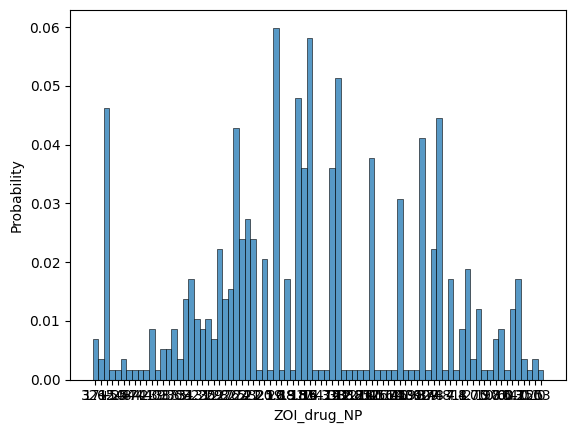

In [14]:
sns.histplot(df['ZOI_drug_NP'], stat='probability', binwidth=)